# Dataquest Guided Project: Fandango Movie Ratings

This project is a follow up of Hickey's investigation of inflated movie ratings on The Fandango website (reported on [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/)). We are analyzing data from Fandango to see if there has been any change in the rating system since Hickey published his analysis.

We will use the dataset Walt Hickey used for his analysis, which is publicly available on [Github](https://github.com/fivethirtyeight/data/tree/master/fandango). We will compare this with Dataquest's Fandango data collected for movies released in 2016 and 2017, also available publicly on [Github](https://github.com/mircealex/Movie_ratings_2016_17).

In [1]:
import pandas as pd
hickey2015 = pd.read_csv("fandango_score_comparison.csv")
dataquest2017 = pd.read_csv("movie_ratings_16_17.csv")
hickey2015 = hickey2015[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
dataquest2017 = dataquest2017[['movie', 'year', 'fandango']]

Hickey's dataset only includes movies with a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. 
Dataquest's dataset is a little less rigorous in it's README.md. It includes 214 of the "most popular" movies (by what metric?) with a "significant" number of votes (what does significant mean here?).

It makes sense to change our analysis to the population of movies with at least 30 fan ratings on Fandango. We will compare 2015 and 2016 ratings.

However, the dataquest2017 dataset does not include number of fan ratings on Fandango. To make sure it is a representative sample, we will select 10 random films from the dataquest2017 dataset and check the number of fan ratings manually.

In [2]:
dataquest2017.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Fandango no longer has their own audience ratings as of March 2022. Here is what they were in April 2018:

|                  Movie                  | Fan ratings |
|:---------------------------------------:|:-----------:|
| Mechanic: Resurrection                  | 2247        |
| Warcraft                                | 7271        |
| Max Steel                               | 493         |
| Me Before You                           | 5263        |
| Fantastic Beasts and Where to Find Them | 13400       |
| Cell                                    | 17          |
| Genius                                  | 127         |
| Sully                                   | 11877       |
| A Hologram for the King                 | 500         |
| Captain America: Civil War              | 35057       |

90% of the movies selected have at least 30 fan reviews, so we are going to consider this sample good enough. Next, we will limit the Hickey dataset to just movies released in 2015, and the Dataquest dataset to just movies released in 2016.

In [3]:
hickey2015['Year'] = hickey2015['FILM'].str[-5:-1]
hickey2015['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [4]:
hickey2015 = hickey2015[hickey2015['Year']=='2015']
hickey2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [5]:
dataquest2017['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [6]:
dataquest2017 = dataquest2017[dataquest2017['year']==2016]
dataquest2017['year'].value_counts()

2016    191
Name: year, dtype: int64

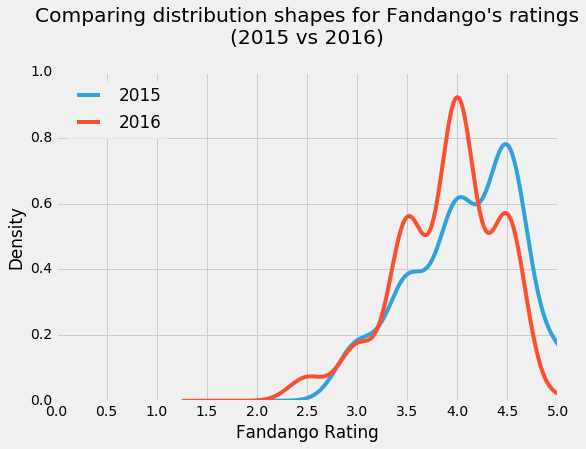

In [12]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

plt.style.use('fivethirtyeight')

hickey2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize = (8,5.5))
dataquest2017['fandango'].plot.kde(label='2016', legend=True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
         y=1.07)
plt.xlabel('Fandango Rating')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,0.5))
plt.show()

Visually, it appears that Fandango's ratings were indeed lower and more normally distributed in 2016 than in 2015.

In [14]:
print('2015' + '\n' + '-' * 16)
hickey2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [15]:
print('2016' + '\n' + '-' * 16)
dataquest2017['fandango'].value_counts(normalize=True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

From the tables, it appears the ratings are moving more towards 4.0 in general, not just decreasing.

In [16]:
print('2015 mean: ', hickey2015['Fandango_Stars'].mean())
print('2015 median: ', hickey2015['Fandango_Stars'].median())
print('2015 mode: ', hickey2015['Fandango_Stars'].mode())

2015 mean:  4.0852713178294575
2015 median:  4.0
2015 mode:  0    4.5
dtype: float64


In [18]:
print('2016 mean: ', dataquest2017['fandango'].mean())
print('2016 median: ', dataquest2017['fandango'].median())
print('2016 mode: ', dataquest2017['fandango'].mode())

2016 mean:  3.887434554973822
2016 median:  4.0
2016 mode:  0    4.0
dtype: float64


In [20]:
mean_2015 = hickey2015['Fandango_Stars'].mean()
mean_2016 = dataquest2017['fandango'].mean()

median_2015 = hickey2015['Fandango_Stars'].median()
median_2016 = dataquest2017['fandango'].median()

mode_2015 = hickey2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = dataquest2017['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


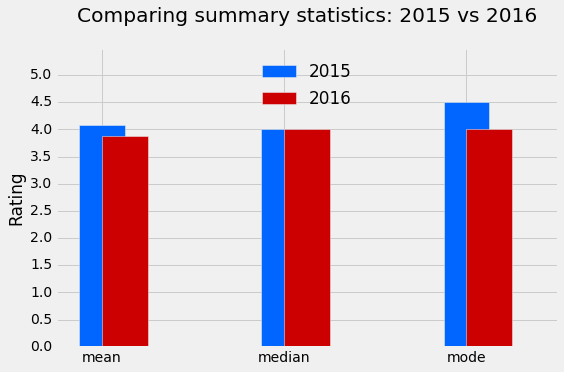

In [21]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Rating')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()